
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E04_logistic_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Logistic regression exercises 

---
These are introductory exercises in Machine learning with focus in **logistic regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Iris flower dataset (*)

In the whole exercise, we will work with the famous Iris flower dataset, which was collected in 1936 by Ronald Fisher, a statistician and biologist. Use the ```datasets``` module from scikit-learn to load the iris dataset. 

&nbsp; a) Check keys on the loaded data and check what the different values for each key are.

&nbsp; b) Now insert the data into a DataFrame. 

&nbsp; c) Do some EDA to get an understanding of the dataset. 

&nbsp; d) Make a correlation heatmap to see how each feature is correlated to each other. What do the numbers mean?

&nbsp; e) Make a boxplot. The points outside of the boxplot are statistically calculated outliers using Tukey's rule for boxplot. 

&nbsp; f) Now remove the outliers in data. (**)

- Lower bound outlier: $Q_1 - 1.5\cdot IQR$
- Upper bound outlier: $Q_3 + 1.5\cdot IQR$

where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

<details>

<summary>Hint</summary>

a) For DESCR key you need to print it.

f) Dataframes has a quantile method.  

</details>

<details>

<summary>Answer</summary>

b) 

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   species | specie_name   |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|----------:|:--------------|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |         0 | setosa        |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |         0 | setosa        |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |         0 | setosa        |
|  3 |                 4.6 |                3.1 |                 1.5 |                0.2 |         0 | setosa        |
|  4 |                 5   |                3.6 |                 1.4 |                0.2 |         0 | setosa        |

c) When you do describe, remove species as its statistical values are meaningless. 

|                   |    mean |      std |   min |   25% |   50% |   75% |   max |
|:------------------|--------:|---------:|------:|------:|------:|------:|------:|
| sepal length (cm) | 5.84333 | 0.828066 |   4.3 |   5.1 |  5.8  |   6.4 |   7.9 |
| sepal width (cm)  | 3.05733 | 0.435866 |   2   |   2.8 |  3    |   3.3 |   4.4 |
| petal length (cm) | 3.758   | 1.7653   |   1   |   1.6 |  4.35 |   5.1 |   6.9 |
| petal width (cm)  | 1.19933 | 0.762238 |   0.1 |   0.3 |  1.3  |   1.8 |   2.5 |


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [160]:
df["class"].nunique()

3

In [161]:
df["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [162]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


c:\Users\Ars\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


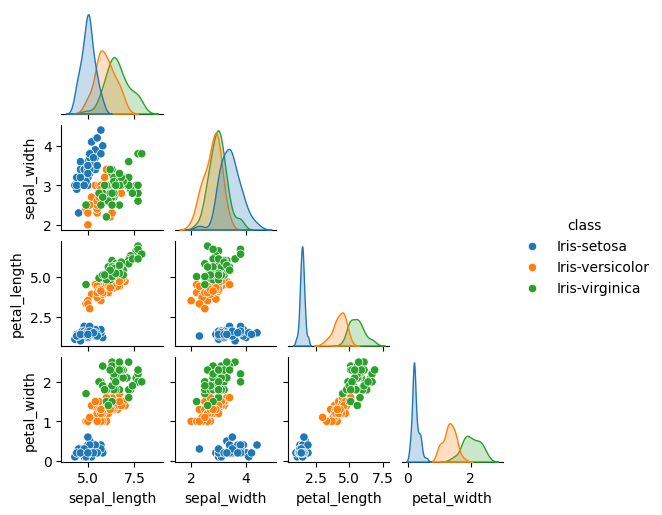

In [163]:
sns.pairplot(df, corner=True, hue="class", height=1.3)

In [164]:
numerical_df = df.select_dtypes(include='number')
correlation_matrix = numerical_df.corr()

correlation_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

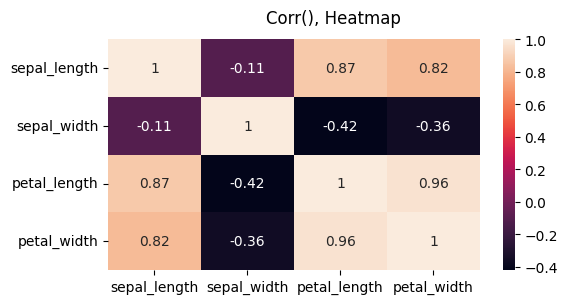

In [165]:
fig, ax = plt.subplots(figsize = (6, 3), label = "MY plot")
fig.suptitle("Corr(), Heatmap")
sns.heatmap(correlation_matrix, annot=True)

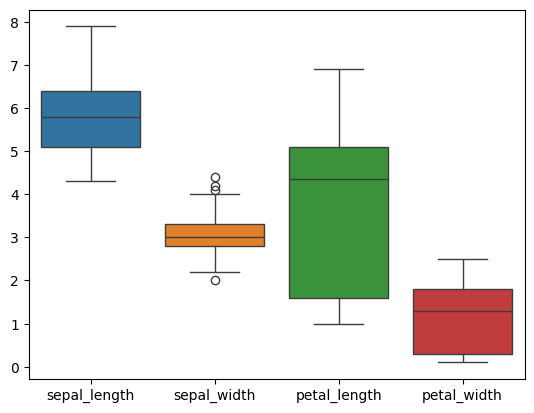

In [166]:
sns.boxplot(data=df)
plt.show()

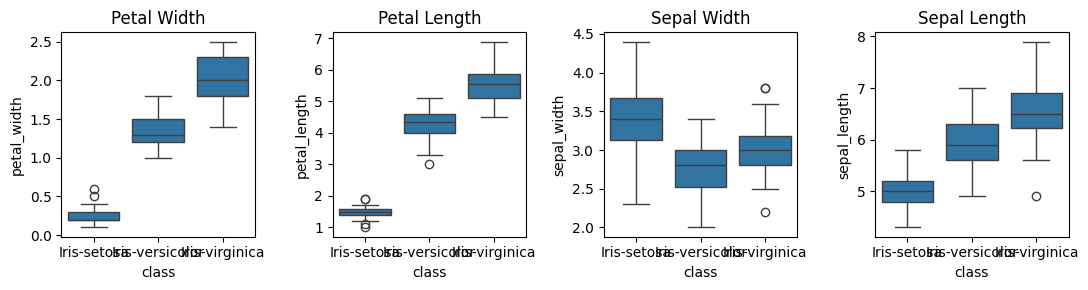

In [167]:
plt.figure(figsize=(11, 3))

# Boxplot för petal width
plt.subplot(1, 4, 1)
sns.boxplot(x='class', y='petal_width', data=df)
plt.title('Petal Width')

# Boxplot för petal length
plt.subplot(1, 4, 2)
sns.boxplot(x='class', y='petal_length', data=df)
plt.title('Petal Length')

# Boxplot för sepal width
plt.subplot(1, 4, 3)
sns.boxplot(x='class', y='sepal_width', data=df)
plt.title('Sepal Width')

# Boxplot för sepal length
plt.subplot(1, 4, 4)
sns.boxplot(x='class', y='sepal_length', data=df)
plt.title('Sepal Length')

plt.tight_layout()
plt.show()

In [168]:
# Funktion för att ta bort outliers baserat på kvartiler och IQR
def remove_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrera och returnera DataFrame utan outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Ange vilken kolumn du vill ta bort outliers från
column_to_check = 'petal_length'

# Anropa funktionen för att få DataFrame utan outliers
df_no_outliers = remove_outliers(column_to_check)

# Skriv ut det ursprungliga antalet rader och antalet rader efter att ha tagit bort outliers
print("Ursprungligt antal rader:", df.shape[0])
print("Antal rader utan outliers:", df_no_outliers.shape[0])

Ursprungligt antal rader: 150
Antal rader utan outliers: 150


In [169]:
def remove_outliers(df):
    for column in df.columns:
        # Konvertera kolumnen till numeriska värden
        df[column] = pd.to_numeric(df[column], errors='coerce')

        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrera och uppdatera DataFrame utan outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        # Skriv ut relevant information för varje kolumn
        print(f"Column: {column}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Number of rows after removing outliers: {df.shape[0]}\n")

    return df

# Anropa funktionen för att få DataFrame utan outliers
df_no_outliers = remove_outliers(df)

Column: sepal_length
Q1: 5.1, Q3: 6.4, IQR: 1.3000000000000007
Lower Bound: 3.1499999999999986, Upper Bound: 8.350000000000001
Number of rows after removing outliers: 150

Column: sepal_width
Q1: 2.8, Q3: 3.3, IQR: 0.5
Lower Bound: 2.05, Upper Bound: 4.05
Number of rows after removing outliers: 146

Column: petal_length
Q1: 1.6, Q3: 5.1, IQR: 3.4999999999999996
Lower Bound: -3.649999999999999, Upper Bound: 10.349999999999998
Number of rows after removing outliers: 146

Column: petal_width
Q1: 0.3, Q3: 1.8, IQR: 1.5
Lower Bound: -1.95, Upper Bound: 4.05
Number of rows after removing outliers: 146

Column: class
Q1: nan, Q3: nan, IQR: nan
Lower Bound: nan, Upper Bound: nan
Number of rows after removing outliers: 0



In [170]:
print("Ursprungligt antal rader:", df.shape[0])
print("Antal rader utan outliers:", df_no_outliers.shape[0])

Ursprungligt antal rader: 150
Antal rader utan outliers: 0


## 1. Split and scale data (*)

Do train|test split and scale the data using feature standardization, I used default test size 0.33 and random state 42. Check the mean and standard deviation on training and test data. 

---

## 2. Classify with logistic regression (*)

Use k-folded cross-validation with logistic regression to find suitable hyperparameters and model. Check the documentation to see which parameters that can be chosen through cross-validation. Check the models parameters and see what it has chosen. 

<details>

<summary>Answer</summary>

weights: 

```py
array([[-1.33033256,  1.35076961, -2.26169407, -2.07715072],
       [ 0.40073538, -0.28598722, -0.58388865, -0.7782766 ],
       [ 0.67977172, -0.81485664,  3.09503329,  3.10542664]])
```

$\ell_1$-ratio:

```py
array([0.2, 0.2, 0.2])
```


<img src = "../assets/pairplot_iris.png" height=300>

Do more EDA than I show here. 

d) Correlation heatmap

<img src = "../assets/Correlation_iris.png" height=300>

The closer the value is to 1 between two features, the more positively linear relationships between them. The closer the value is to -1 the more negatively linear relationships between them. 

e) 

<img src = "../assets/boxplot_iris.png" height=200>

f)
Outlier rows are: [13, 15, 22, 23, 24, 41, 43, 44, 98, 106, 117, 119, 131]

value counts:

|            |   specie_name |
|:-----------|--------------:|
| versicolor |            49 |
| virginica  |            46 |
| setosa     |            42 |

</details>

---

## 3. Evaluate model (*)

Make a prediction on the testing data. 

&nbsp; a) Check manually the first 10 values of $y_{test}$ against your prediction. 

&nbsp; b) Plot a confusion matrix. Can you see which predictions the model have mispredicted?

&nbsp; c) Print a classification report 

<details>

<summary>Answer</summary>


b) 

<img src = "../assets/confusion_matrix_iris.png" height=300>



c) 

Classification report 

```py
          precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        16

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46
```






</details>

---

## 4. $k$-folded cross-validation for evaluation (**)

To be more robust in reporting the results, you should report the results as $\mu_{score}$, i.e. average score through a k-folded cross-validation. Report the score for precision, recall, f1-score for each label and overall accuracy. Do the cross-validation manually using for statement. 

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---